# Predicting Bike Rentals
## Introduction
In this project, we'll try to predict the total number of bikes people rented in a given hour. We'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, we'll create a few different machine learning models and evaluate their performance.

The [data](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) compiled by Hadi Fanaee-T at University of Porto contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day in Washington, D.C.

Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

## Reading & exploring the dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
bike_rentals = pd.read_csv('/Users/sahithi/Documents/Python Projects/Bike-Sharing-Dataset/hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


/Users/sahithi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1000.0)

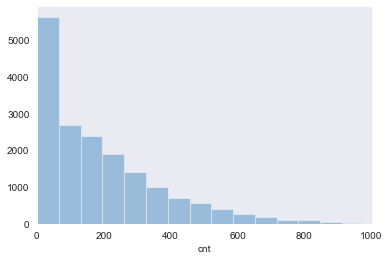

In [15]:
# Plot a histogram to see the distribution of cnt column
sns.set_style('dark')
sns.distplot(bike_rentals.cnt, kde = False, bins = 15)
plt.xlim(0, 1000)

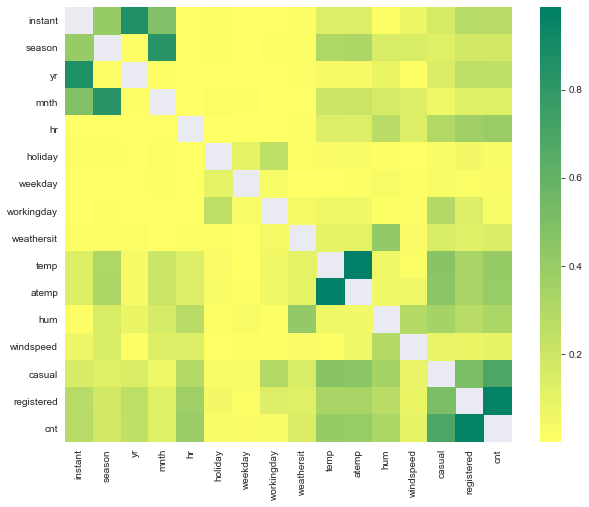

In [16]:
# Explore correlations between cnt and all the other columns 
corr = bike_rentals.corr()

# Plot a heatmap to better show correlations 
fig = plt.figure(figsize = (10,8))
mask = corr == 1
heatmap = sns.heatmap(abs(corr), mask = mask, cmap = 'summer_r')
# heatmap.set_xticklabels(labels = corr.columns, rotation=30)

## Preparing the dataset for training

In [17]:
# Function to label different hours in a day 
def assign_label(hour):
    if 6 < hour <= 12:
        return 1
    elif 12 < hour <= 18:
        return 2           
    elif 18 < hour <= 24:
        return 3
    else:
        return 4

# Create a new column
bike_rentals['time_label'] = bike_rentals.apply(lambda x: assign_label(x.hr), axis = 1)

In [18]:
# Split data into train, cross validation and test sets
from sklearn.model_selection import train_test_split
# Split the whole dataset for 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(bike_rentals.drop('cnt', axis = 1), 
                                                    bike_rentals.cnt,
                                                    test_size = 0.2,
                                                    random_state = 1)

# Split trainning set for final 60% train, 20% cross validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.25, random_state = 1)

In [19]:
# Check split result
X_train.shape, X_val.shape, X_test.shape

((10427, 17), (3476, 17), (3476, 17))

In [20]:
X_train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'time_label'],
      dtype='object')

In [21]:
# Pick features based on the heatmap we generated before
features = ['season', 'yr', 'mnth', 'hr', 'weathersit', 'temp', 'atemp', 
            'hum', 'windspeed', 'time_label']

## Train & predict
### Linear regression model

In [22]:
# Train & predict using Ridge model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize = True)
lr.fit(X_train[features], y_train)
preds_train = lr.predict(X_train[features])
preds_val = lr.predict(X_val[features])
mse_train = mean_squared_error(y_train, preds_train)
mse_val = mean_squared_error(y_val, preds_val)

print('''The training mse of the model is: {}, 
      The cross validation mse is: {}.'''.format(mse_train, mse_val))

The training mse of the model is: 16392.533780589492, 
      The cross validation mse is: 15720.812786104083.


In [23]:
# Plot learning curve
mses_train = []
mses_val = []
for i in range(1, 100):
    lr = LinearRegression(normalize = True)
    lr.fit(X_train[:i][features], y_train[:i])
    preds_train = lr.predict(X_train[features])
    preds_val = lr.predict(X_val[features])
    mse_train = mean_squared_error(y_train, preds_train)
    mse_val = mean_squared_error(y_val, preds_val)
    mses_train.append(mse_train)
    mses_val.append(mse_val)

(10000.0, 100000.0)

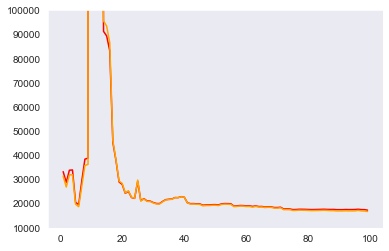

In [24]:
plt.plot(range(1,100), mses_train, color = 'red')
plt.plot(range(1,100), mses_val, color = 'orange')
plt.ylim(1e4, 1e5)

From the above results, we can see that the training mse and cross validation mse errors are really high. This indcates that our model is underfitting. lets try a Dicision tree regressor model and see how it fits.


### Dicision tree regressor

In [26]:
# Train & predict using decision tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train[features], y_train)
tree_preds_train = dtr.predict(X_train[features])
tree_preds_val = dtr.predict(X_val[features])
tree_mse_train = mean_squared_error(y_train, tree_preds_train)
tree_mse_val = mean_squared_error(y_val, tree_preds_val)
print('''The training mse of the dicistion tree model is: {}, 
      The cross validation mse is: {}.'''.format(tree_mse_train, tree_mse_val))

The training mse of the dicistion tree model is: 50.40483040823503, 
      The cross validation mse is: 13028.860479797979.


The single decision tree model has a very low training error but really high cross validation error. This strongly indicates that our model is overfitting.

let's tweak some parameters and see how the training and cross validation errors change.

In [27]:
# Train & predict using decision tree model and tweak parameters
for leaf_num in range(5, 20):
    dtr = DecisionTreeRegressor(min_samples_leaf=leaf_num, random_state=1)
    dtr.fit(X_train[features], y_train)
    tree_preds_train = dtr.predict(X_train[features])
    tree_preds_val = dtr.predict(X_val[features])
    tree_mse_train = mean_squared_error(y_train, tree_preds_train)
    tree_mse_val = mean_squared_error(y_val, tree_preds_val)
    print('''With a minimum leaf number of {}, the training mse of the dicistion tree model is: {} | 
    The cross validation mse is: {}.'''.format(leaf_num, tree_mse_train, tree_mse_val), 
          '\n', '*'*30)

With a minimum leaf number of 5, the training mse of the dicistion tree model is: 4104.481083132631 | 
    The cross validation mse is: 9827.904864579104. 
 ******************************
With a minimum leaf number of 6, the training mse of the dicistion tree model is: 4613.901662305971 | 
    The cross validation mse is: 9457.242926091765. 
 ******************************
With a minimum leaf number of 7, the training mse of the dicistion tree model is: 4949.641102782483 | 
    The cross validation mse is: 9263.222377124925. 
 ******************************
With a minimum leaf number of 8, the training mse of the dicistion tree model is: 5207.798588299773 | 
    The cross validation mse is: 8914.112090801511. 
 ******************************
With a minimum leaf number of 9, the training mse of the dicistion tree model is: 5408.426742939888 | 
    The cross validation mse is: 8604.83440852735. 
 ******************************
With a minimum leaf number of 10, the training mse of the dic

In [28]:
# Using the best min_samples_leaf value, experiment with max_depth parameter
for depth in range(2, 15):
    dtr = DecisionTreeRegressor(min_samples_leaf=19, max_depth=depth, random_state=1)
    dtr.fit(X_train[features], y_train)
    tree_preds_train = dtr.predict(X_train[features])
    tree_preds_val = dtr.predict(X_val[features])
    tree_mse_train = mean_squared_error(y_train, tree_preds_train)
    tree_mse_val = mean_squared_error(y_val, tree_preds_val)
    print('''With a minimum leaf number of 19, and the max depth of {}, 
    the training mse of the dicistion tree model is: {} | 
    The cross validation mse is: {}.'''.format(depth, tree_mse_train, tree_mse_val), 
          '\n', '*'*30)

With a minimum leaf number of 19, and the max depth of 2, 
    the training mse of the dicistion tree model is: 19732.51378627246 | 
    The cross validation mse is: 18233.801468025704. 
 ******************************
With a minimum leaf number of 19, and the max depth of 3, 
    the training mse of the dicistion tree model is: 16894.142172026743 | 
    The cross validation mse is: 16278.501232608107. 
 ******************************
With a minimum leaf number of 19, and the max depth of 4, 
    the training mse of the dicistion tree model is: 14398.79083502228 | 
    The cross validation mse is: 14001.005996035043. 
 ******************************
With a minimum leaf number of 19, and the max depth of 5, 
    the training mse of the dicistion tree model is: 11960.432573363782 | 
    The cross validation mse is: 11433.478909772992. 
 ******************************
With a minimum leaf number of 19, and the max depth of 6, 
    the training mse of the dicistion tree model is: 10623.0841

As we can see, with some parameter tweaking, we were able to decrease both the cross validation error and the gap between training and cross validation errors dramatically.

### Random forest regressor

In [33]:
# Train & predict with no parameter tweak
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train[features], y_train)
train_preds_rfr = rfr.predict(X_train[features])
val_preds_rfr = rfr.predict(X_val[features])
mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
print('''The training mse of the random forest model is: {}, 
      The cross validation mse is: {}.'''.format(mse_train_rfr, mse_val_rfr))

The training mse of the random forest model is: 1079.0801681097369, 
      The cross validation mse is: 7433.097918737255.


In [34]:
# Train & predict using random forest model and tweak parameters
mses_train_rfr = []
mses_val_rfr = []
for leaf_num in range(5, 20):
    rfr = RandomForestRegressor(min_samples_leaf=leaf_num, random_state=1)
    rfr.fit(X_train[features], y_train)
    train_preds_rfr = rfr.predict(X_train[features])
    val_preds_rfr = rfr.predict(X_val[features])
    mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
    mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
    mses_train_rfr.append(mse_train_rfr)
    mses_val_rfr.append(mse_val_rfr)
    print('''With a minimum leaf number of {}, the training mse of the dicistion tree model is: {} | 
    The cross validation mse is: {}.'''.format(leaf_num, mse_train_rfr, mse_val_rfr), 
          '\n', '*'*30)

With a minimum leaf number of 5, the training mse of the dicistion tree model is: 4119.93346166227 | 
    The cross validation mse is: 7242.371717372614. 
 ******************************
With a minimum leaf number of 6, the training mse of the dicistion tree model is: 4524.116065162434 | 
    The cross validation mse is: 7228.9256145154095. 
 ******************************
With a minimum leaf number of 7, the training mse of the dicistion tree model is: 4852.67609201535 | 
    The cross validation mse is: 7205.8276514037725. 
 ******************************
With a minimum leaf number of 8, the training mse of the dicistion tree model is: 5133.848523736162 | 
    The cross validation mse is: 7215.056913627506. 
 ******************************
With a minimum leaf number of 9, the training mse of the dicistion tree model is: 5366.268540474919 | 
    The cross validation mse is: 7211.49481176936. 
 ******************************
With a minimum leaf number of 10, the training mse of the dic

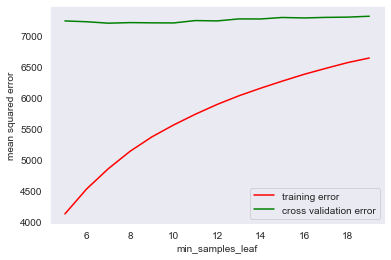

In [35]:
plt.plot(range(5, 20), mses_train_rfr, color = 'red', label = 'training error')
plt.plot(range(5, 20), mses_val_rfr, color = 'green', label = 'cross validation error')
plt.xlabel('min_samples_leaf')
plt.ylabel('mean squared error')
plt.legend(loc = 'lower right')

From the plot above, we can find the optimal value for min_sample_leaf is around 11. Let's use that to try out other parameteres.
We will tune our model and experiment with n_estimators.

In [36]:
# Experiment with max_depth with bootstrap set to True
mses_train_d = []
mses_val_d = []
for depth in range(2,15): 
    rfr = RandomForestRegressor(max_depth = depth, min_samples_leaf=11, random_state=1, bootstrap = True)
    rfr.fit(X_train[features], y_train)
    train_preds_rfr = rfr.predict(X_train[features])
    val_preds_rfr = rfr.predict(X_val[features])
    mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
    mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
    mses_train_d.append(mse_train_rfr)
    mses_val_d.append(mse_val_rfr)
    print('''With max_depth {}, and a minimum leaf number of 11, the training mse of the dicistion tree model is: {} | 
    The cross validation mse is: {}.'''.format(depth, mse_train_rfr, mse_val_rfr), 
          '\n', '*'*30)

With max_depth 2, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 19491.86534780955 | 
    The cross validation mse is: 17978.350916759406. 
 ******************************
With max_depth 3, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 16608.172083786412 | 
    The cross validation mse is: 15963.275006211179. 
 ******************************
With max_depth 4, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 14131.093544170633 | 
    The cross validation mse is: 13713.314252989609. 
 ******************************
With max_depth 5, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 11521.39527141379 | 
    The cross validation mse is: 11048.651092017402. 
 ******************************
With max_depth 6, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 9769.667714135132 | 
    The cross validation mse is: 9542.81276428159

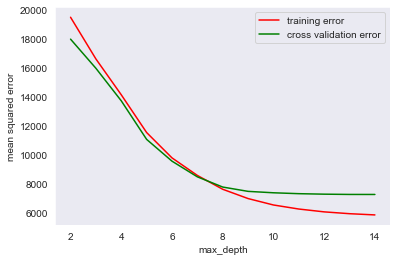

In [37]:
plt.plot(range(2, 15), mses_train_d, color = 'red', label = 'training error')
plt.plot(range(2, 15), mses_val_d, color = 'green', label = 'cross validation error')
plt.xlabel('max_depth')
plt.ylabel('mean squared error')
plt.legend(loc = 'upper right')

From the plot above, we can find the optimal value for max_depth is 8, where training error and cross validation error converges. Let's use that to try out n_estimators.

In [38]:
# Experiment with n_estimator with bootstrap set to True
# Train & predict using random forest model and tweak parameters
mses_train_e = []
mses_val_e = []
for n in range(100, 200, 10): # increment estimator by 10 from 100 to 200
    rfr = RandomForestRegressor(n_estimators = n, min_samples_leaf=11, max_depth = 8, random_state=1, bootstrap = True)
    rfr.fit(X_train[features], y_train)
    train_preds_rfr = rfr.predict(X_train[features])
    val_preds_rfr = rfr.predict(X_val[features])
    mse_train_rfr = mean_squared_error(y_train, train_preds_rfr)
    mse_val_rfr = mean_squared_error(y_val, val_preds_rfr)
    mses_train_e.append(mse_train_rfr)
    mses_val_e.append(mse_val_rfr)
    print('''With {} estimators, and a minimum leaf number of 11, the training mse of the dicistion tree model is: {} | 
    The cross validation mse is: {}.'''.format(n, mse_train_rfr, mse_val_rfr), 
          '\n', '*'*30)

With 100 estimators, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 7599.745346972066 | 
    The cross validation mse is: 7753.535982688379. 
 ******************************
With 110 estimators, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 7607.057977664722 | 
    The cross validation mse is: 7762.977832669812. 
 ******************************
With 120 estimators, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 7604.94987572181 | 
    The cross validation mse is: 7759.838595839145. 
 ******************************
With 130 estimators, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 7604.163823095941 | 
    The cross validation mse is: 7759.704109275538. 
 ******************************
With 140 estimators, and a minimum leaf number of 11, the training mse of the dicistion tree model is: 7604.800132151554 | 
    The cross validation mse is: 7755.246

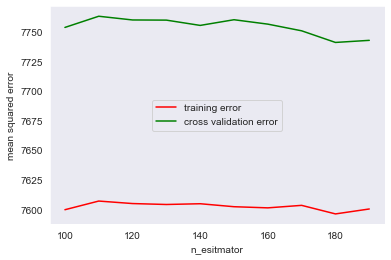

In [39]:
plt.plot(range(100, 200, 10), mses_train_e, color = 'red', label = 'training error')
plt.plot(range(100, 200, 10), mses_val_e, color = 'green', label = 'cross validation error')
plt.xlabel('n_esitmator')
plt.ylabel('mean squared error')
plt.legend(loc = 'center')

Let's use our best model to predict some bike rentals.

In [40]:
# Predict bike rentals 
model = RandomForestRegressor(n_estimators = 180, min_samples_leaf=11, 
                              max_depth = 8, random_state=1, bootstrap = True)
model.fit(X_train[features], y_train)
predictions = model.predict(X_test[features])

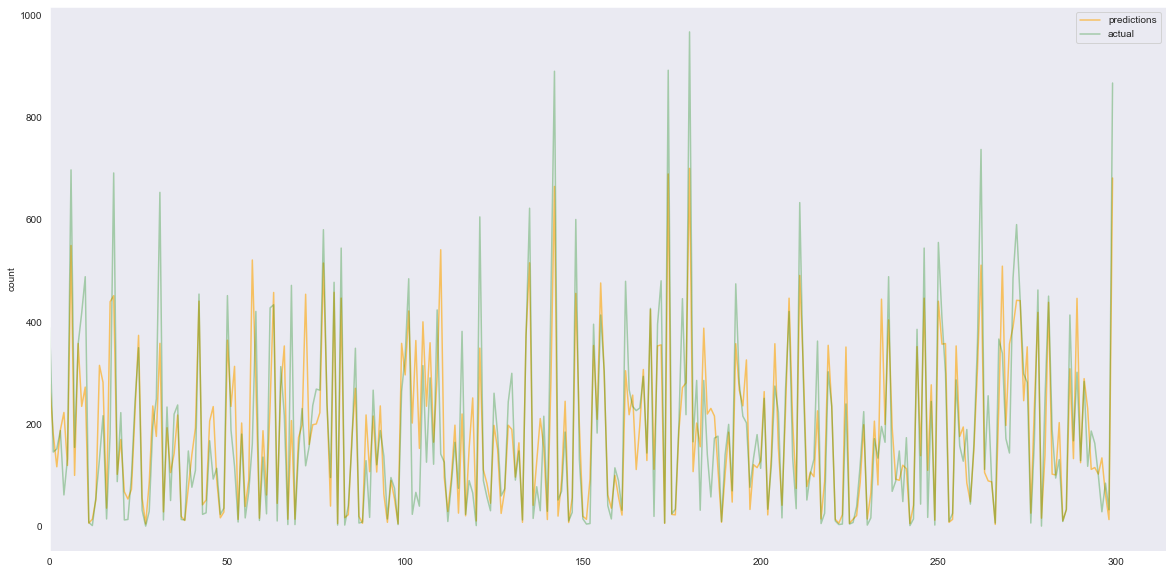

In [41]:
# Plot prediction vs actual values on part of the data
fig = plt.figure(figsize = (20,10))
plt.plot(range(len(X_test[:300])), predictions[:300], color = 'orange', label = 'predictions', alpha = 0.6)
plt.plot(range(len(X_test[:300])), y_test[:300], color = 'green', label = 'actual', alpha = 0.3)
plt.xlim(0, )
plt.ylabel('count')
plt.legend()

From the plot above, it looks like our model is failling in predicting the high counts, which are the right skewed outliers in the histogram we plotted at the begining of our project. But the predictions fits the actual values mostly.

## Conclusion:
The best results for the three models we tried in this project are as below:
- Linear Regression	
    - Training error: 16392.5	
    - Cross validation error: 15720.8
- Decision Tree Regressor	
    - Training error:7692.7	
    - Cross validation error:7996.98
- Random Forest Regressor	
    - Training error: 7596.2	
    - Cross validation error: 7740.8
    
It's pretty clear that RandomForest is best at predition accuracy.